###  Islands: Python Foundations - Chapter 8

[Back to Main Page](0_main_page.ipynb)

[How to use this book interactively on Deepnote](99_how_to_use_this_book.ipynb)

[Download this book](99_how_to_use_this_book_local.ipynb)

<br>

<h1> <center> Testing via Simulation II: Pollutant Exposure </center> </h1> 

## Something in the air, something in the water 

[Better tie-in here] Is it the high levels of pollution that affect the island, as the epidemiologist in your research group stated?

To try and answer this question, your team decides to investigate whether high `pollutant_exposure` is associated with high `cognitive_impairment` by conducting an [observational study](https://www.iwh.on.ca/what-researchers-mean-by/observational-vs-experimental-studies#:~:text=Observational%20studies%20are%20ones%20where,two%20types%20of%20observational%20studies.). You take a new random sample of 100 people from the island, all of whom agree to participating in the study. Arm-worn air monitors are used to record the average number of micrograms per cubic metre (`μg/m^3`) of a variety of pollutants that each participant is exposed to each day over several weeks. The participants also complete a psychological questionairre which measures cognitive impairment.

(It is important that the sample is random to ensure the highest chance that it is representative of the whole population of the island (e.g.the lowest probability of a fluke result). 'Random' in this context means that each islander has an equal probability of being included in the sample. The research group ensures that the sample is random by picking islanders from census data using a random number generator (python makes it easy to do this!)).

The graph below shows a scatterplot of the `pollutant_exposure` scores against the `cognitive_impairment` scores. Each point represents the score on each variable for one individual in the sample:

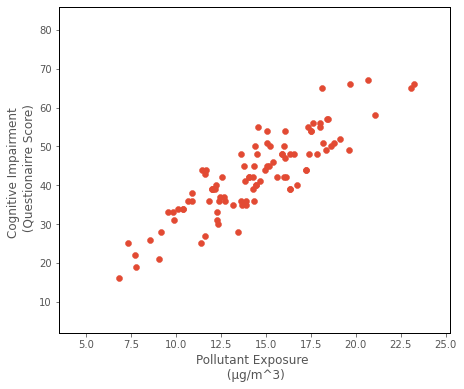

In [17]:
# run this cell to generate the data for this example
# do not worry about this code, it just runs some functions to generate the graph below
pollutant_exposure_pop, cognitive_impairment_pop, cognitive_impairment_pop_null,min_x, max_x, min_y, max_y, pollutant_exposure, cognitive_impairment = py_found.data_gen_pollution()
py_found.plot_sample(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

As before, it is important to graphically inspect the data.
    
From the graph above, do you think there is a relationship between `pollutant_exposure` and `cognitive_impairment`? Take a few moments to look at the graph and think about this before reading on... (remember that each point represents a single individual's score on both variables).
    
It does appear, from graphical inspection, that the two variables are related. It looks like people with higher scores on `pollutant_exposure` generally had higher scores on `cognitive_impairment`. 
    
To get a statistic that captures this relationship, we can calculate [Pearson's $r$](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/). 
    
Pearson's $r$ ranges from -1 to 1, and indicates the strength and direction of the linear (straight-line) relationship between two numerical variables. The graph below shows some ways the sample could have looked, and what Pearson's $r$ would be in that instance:

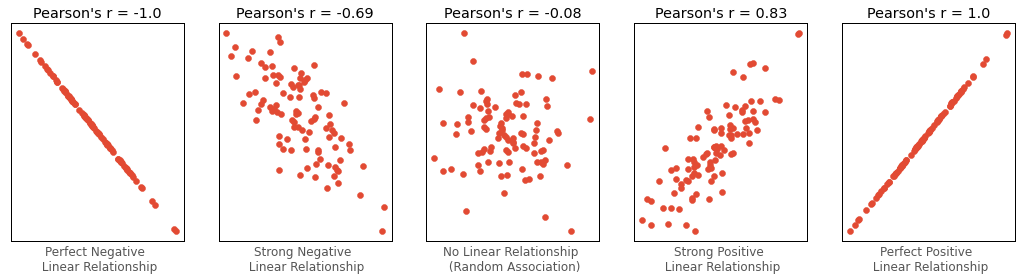

In [18]:
# this code just generates the plot below
py_found.pearson_plot(pollutant_exposure)

Let's calculate Pearson's $r$ for the `pollutant_exposure` and `cognitive_impairment` data from the sample. This statistic is calculated using a python function (more on this [later](3_functions_plotting.ipynb)!).

Do not worry about the code below, it just calculates Pearson's $r$, and shows how easy it is to calculate statistics using python. Also do not worry about how Pearson'r $r$ is calculated, for now let's just focus on what the statistic tells us. If you are interested in the specifics of how Pearson's $r$ is computed [see this page](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/):

In [19]:
# this code just calculates pearson's r, rounds it to two decimal places, and then prints it below the cell
actual_r = np.round(scipy.stats.pearsonr(pollutant_exposure, cognitive_impairment)[0], 2)
print("Pearson's r = ", actual_r )

Pearson's r =  0.87


A Pearson's $r$ value of 0.87 represents a very strong positive linear relationship between the two variables, meaning that, in our sample of 100 islanders, high `pollutant_exposure` scores are generally paired with high `cognitive_impairment` scores.

## Populations & Samples, Parameters & Statistics

So, is the hypothesis settled then? Can we conclude that `pollutant_exposure` is associated with `cognitive_impairment`? And further, from that association can we conclude that high `pollutant_exposure` causes `cognitive_impairment`?

Remember that our sample is of 100 people. There are 1000 people on the island. Our hypothesis - that `pollutant_exposure` is associated with `cognitive_impairment` - is about all 1000 people on the island, not just the 100 people in our sample.

In statistical terms, our hypothesis is about the *population* of the island. The term '*population*' was mentioned earlier, but let's define it again, in a more technical sense. In statistics, a '*population*' is defined as all the individuals we could theoretically observe, which are relevant to a particular hypothesis. (More specifically, the population is all the *observational units* we could theoretically observe; in this case, these units are individual people, but in other instances they may be plants, cars, books, stars etc., depending on the subject area...). For our current hypothesis, the population is all the individuals who live on the island.

However, our data comes from our *sample*, which is a subset of the total population.

The numerical characteristics (such as Pearson's $r$) of *populations* are called *parameters*. <br>
The numerical characteristics (such as Pearson's $r$) of *samples* are called *statistics*.

As with the drug trial, the question remains: what if the pattern we observe in our sample is not reflective of the pattern in the population? Our sample was drawn randomly, but what if, just by chance, we got a sample which shows a strong relationship between `pollutant_exposure` and`cognitive_impairment`, even though none exists in the underlying population?

The two graphs below both show our sample (in red). They also show two ways that the underlying population of all 1000 islanders (shown in dark blue) *could* look: 

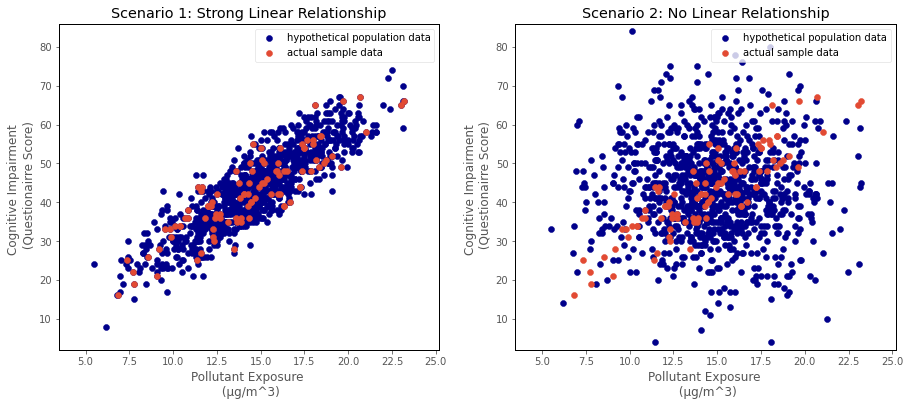

In [20]:
# this code just generates the graph below
py_found.plot_populations(pollutant_exposure_pop, cognitive_impairment_pop, cognitive_impairment_pop_null, pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

You can think of each of these graphs as showing two possible states of the world which could have generated our sample. 

In the graph on the left (`Scenario 1`), the pattern in the sample is reflective of the relationship in the underlying population. In `Scenario 1` the hypothetical underlying population shows a *strong positive linear relationship* between `pollutant_exposure` and `cognitive_impariment`. Higher scores on `pollutant_exposure` are generally paired with higher scores on `cognitive_impairment`. So if we know a given individual's `pollutant_exposure` score, this tells us a lot about their `cognitive_impairment` score (if their `pollutant_exposure` score is high, their `cognitive_impairment` score is also probably high, and *vice versa*).

In the graph on the right (`Scenario 2`), the pattern in the sample is <b> not </b> reflective of the relationship in the hypothetical underlying population. In `Scenario 2`, the pattern in our sample is a fluke, and if we infer that the pattern in the population is like the one in our sample, we will be making a serious error. The population pattern shown in this graph is one where there is *no linear relationship* between `pollutant_exposure` and `cognitive_impariment`. The two variables are *randomly associated*. What this means is that, if you look at points with high values of `pollutant_exposure`, these are paired with both *high and low* values of `cognitive_impairment`. This means that an individual's `pollutant_exposure` score does not tell us much about their `cognitive_impairment` score...

If something like `Scenario 2` is true, then the strong linear relationship in our sample is a fluke. It is not feasible to observe all 1000 people on the island in order to work out whether `Scenario 1` or `Scenario 2` is true of the actual underlying population. So, we need a good way of making inferences from our sample statistic about the underlying population parameter, in order to work whether the the *actual* population of the island is most similar to the hypothetical population depicted in `Scenario 1` or `Scenario 2`.

This is a fundamental problem in statistics and data science: we care about *populations* and *parameters* but all we can usually observe are *samples* and *statistics*. 

We need a way of inferring what the population parameter looks like, based on our sample statistic. Statistical methods of making such inferences, from samples to populations, aim to allow us to be *least wrong most of the time*. However, because we are making inferences about population parameters, rather than directly measuring them, there is always some uncertainty in our estimates and conclusions.


## Revisiting the null hypothesis & the null world

To begin the inferential process, we assume that something like `Scenario 2` is true, and ask:

> 'if there was *no relationship* between `pollutant_exposure` and `cognitive_impairment` in the population, how likely is it we would have gotten a sample with the Pearson's $r$ value that our sample had?'

Again, this assumption, of no relationship, is called the *null hypothesis*.

Once more, what python allows us to easily do, is build a model of a world where the null hypothesis is true (again, let's call this the [null world](https://uob-ds.github.io/cfd2021/permutation/permutation_and_t_test.html)). Once we have built a model of the null world, we can draw samples from it repeatedly, and record the distribution of sample statistics that we get from our model of the null world. This gives us an idea of the range of Pearson's $r$ values we would expect if the null hypothesis were true: if `pollutant_exposure` and `cognitive_impairment` were randomly associated in the population. 

We can then compare the Pearson's $r$ statistic from the actual sample to the Pearson's $r$ statistics that we get from samples drawn from our model of the null world. If our actual statistic is very unlikely in the null world, we conclude that the real world is *probably not similar to the null world*.

To get an idea of what we need to do to carry out this inferential process, let's look at the raw data:

In [21]:
# run this cell to generates the dataframe below
df = pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': cognitive_impairment})
pd.set_option('display.max_rows',15)
display(df)

,pollutant_exposure,cognitive_impairment
0,10.40,34
1,11.42,44
2,18.16,51
3,19.10,52
4,12.29,33
...,...,...
95,16.53,48
96,10.12,34
97,10.68,36
98,9.80,33


The dataframe above, shows the raw scores for the individuals in our sample. It is truncated for graphical display (as you've already scrolled through enough dataframes with 100 rows earlier in the page!). 

Each row of the dataframe shows the `pollutant_exposure` and `cognitive_impairment` score for one individual in our sample.

We know that, based on graphical inspection and the Pearson's $r$ we calculated earlier, in this sample *higher* scores on `pollutant_exposure` are generally paired with higher scores on `cognitive_impairment`. This is a *nonrandom* relationship: high `pollutant_exposure` scores have a higher chance of being associated with high `cognitive_impairment` scores.

However, if in the underlying population there was no relationship between `pollutant_exposure` and `cognitive_impairment`, then if we had a dataframe containing the scores for all 1000 islanders, the association between the `pollutant_exposure` scores and `cognitive_impairment` scores in that population dataframe would be random: high `pollutant_exposure` scores would have an equal chance of being associated with high or low `cognitive_impairment` scores.  Thus, if we drew a sample of 100 scores randomly from that population dataframe, we would expect (on average) the relationship between `pollutant_exposure` and `cognitive_impairment` to also be random in that sample. In the null world, any samples which showed a strong relationship (a high Pearson's $r$) would be flukes. For one sample, the relationship may not be exactly random, but on average it should be if we draw repeated samples, as repeated sampling gives us a more accurate picture of the underlying population.

In the dataframe below, the `cognitive_impairment` scores have been shuffled using python. Compare a few rows to the same rows from the dataframe above - you'll see that the `pollutant_exposure` scores are the same for each individual, but the `cognitive_impairment` scores have been randomly shuffled; (re-run the cell a few times to see the shuffling process):

In [22]:
# run this cell to generate the shuffled dataframe below
df = pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': np.random.permutation(cognitive_impairment)})
pd.set_option('display.max_rows',15)
df

,pollutant_exposure,cognitive_impairment
0,10.40,36
1,11.42,48
2,18.16,36
3,19.10,27
4,12.29,42
...,...,...
95,16.53,50
96,10.12,44
97,10.68,45
98,9.80,50


By shuffling the `cognitive_impairment` scores we have simulated a sample from a world where the null hypothesis was true - where the association between the `pollutant_exposure` and `cognitive_impairment` is random.

The three dataframes below show the results of shuffling the `cognitive_impairment` scores three separate times. Again, observe that the `pollutant_exposure` scores stay the same, but the association between them and the `cognitive_impairment` scores is now random:

In [23]:
# run this cell to repeat the shuffling process three times

# set the number of shuffles
n_iters = 3
pd.set_option('display.max_rows',15)
# perform the shuffles, and display the data each time
for i in np.arange(n_iters):
    print('\nShuffle Number', i+1, ':')
    display(pd.DataFrame({'pollutant_exposure': pollutant_exposure,
             'cognitive_impairment': np.random.permutation(cognitive_impairment)}))


Shuffle Number 1 :


,pollutant_exposure,cognitive_impairment
0,10.40,51
1,11.42,35
2,18.16,39
3,19.10,55
4,12.29,36
...,...,...
95,16.53,45
96,10.12,45
97,10.68,45
98,9.80,16



Shuffle Number 2 :


,pollutant_exposure,cognitive_impairment
0,10.40,36
1,11.42,25
2,18.16,44
3,19.10,48
4,12.29,49
...,...,...
95,16.53,54
96,10.12,65
97,10.68,28
98,9.80,42



Shuffle Number 3 :


,pollutant_exposure,cognitive_impairment
0,10.40,39
1,11.42,34
2,18.16,36
3,19.10,48
4,12.29,51
...,...,...
95,16.53,48
96,10.12,42
97,10.68,46
98,9.80,33


The plots below show how the scatterplot of the sample looks, as the `cognitive_impairment` scores are shuffled 6 separate times (re-run the cell several times to see the shuffling process at work):

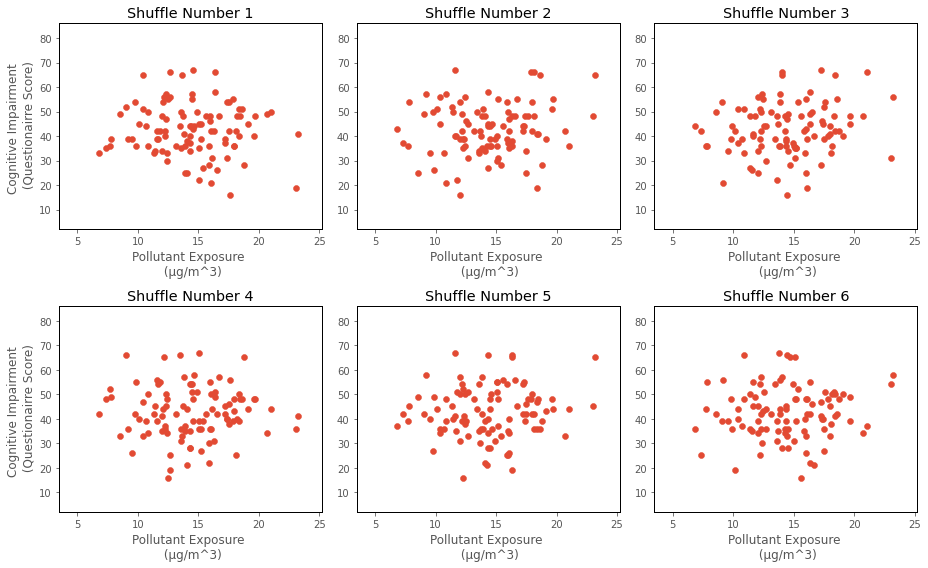

In [24]:
# this code just generates the graphs below
py_found.plot_sample_shuffle(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

Relative to the plot of actual sample (shown below), we can see that this shuffling clearly randomizes the relationship between `pollutant_exposure` and `cognitive_impairment`:

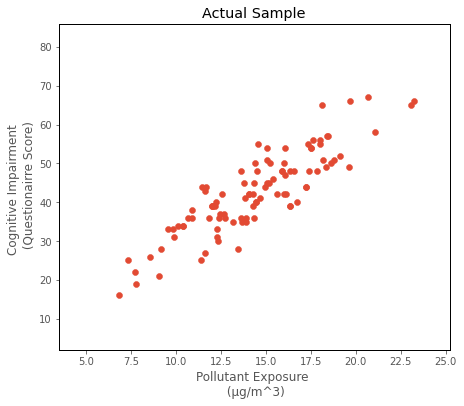

In [25]:
# this code just generates the graph below
plt.title('Actual Sample')
py_found.plot_sample(pollutant_exposure, cognitive_impairment, min_x, max_x, min_y, max_y)

Samples with random associations are generally what we would expect if the population association was random.

The graph below shows 6 shuffles of the sample, plotted against the hypothetical population from `Scenario 2`, where there is no population relationship between `pollutant_exposure` and `cognitive_impairment`. Graphically, you can see that the shuffled sample looks vary similar to the hypothetical underlying population where there is no association between `pollutant_exposure` and `cognitive_impairment`:

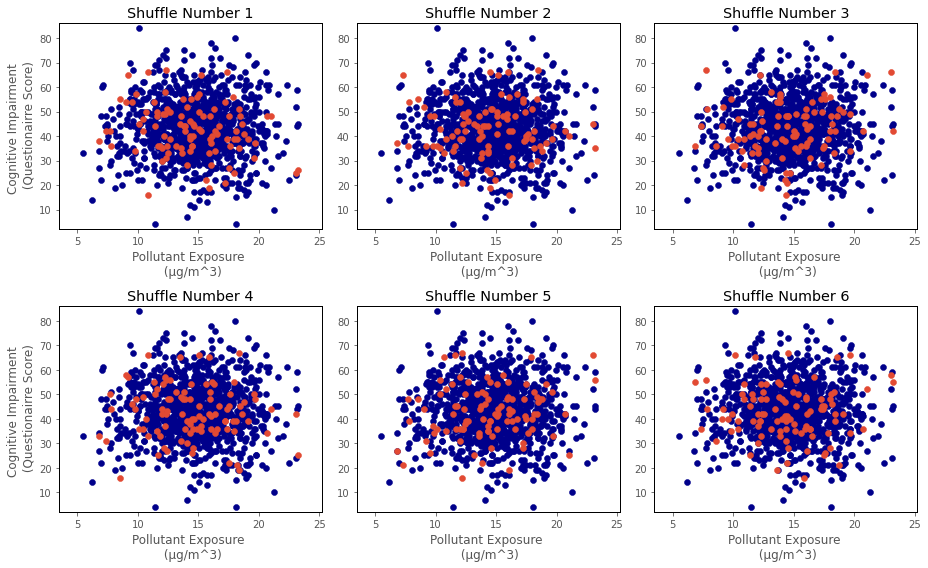

In [26]:
# this code just generates the graphs below
py_found.plot_sample_shuffle_with_pop(pollutant_exposure, cognitive_impairment,  pollutant_exposure_pop, 
                                      cognitive_impairment_pop_null, min_x, max_x, min_y, max_y)

## Simulating the 'null world'

To recapitulate: the shuffling process is simulating a sample from a world in which the null hypothesis is true. E.g. where there is no relationship between `pollutant_exposure` and `cognitive_impairment`.

If we repeat this shuffling process many, many times, and calculate Pearson's $r$ for the shuffled sample each time, we get a distribution of Pearson's $r$ statistics that would be likely if the null hypothesis were true.

The cell below performs this simulation. It shuffles the data, calculates Pearson's $r$ for the shuffled data, and then plots the Pearson's $r$ values obtained from the simulation against the $r$ value from the actual sample (where $r = 0.87$). Don't worry about the specifics of the code, they will become clearer in the rest of the textbook, but do pay attention to how few lines of code it takes to perform this simulation:

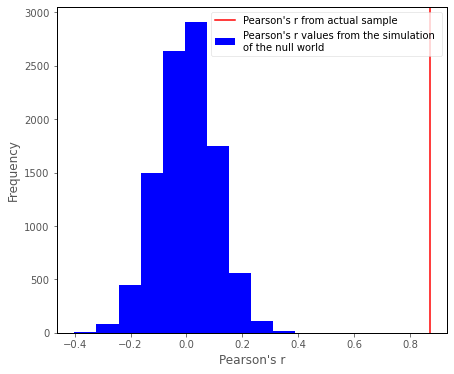

In [27]:
# run this cell to perform the simulation

# set the number of times the shuffling process should be repeated
n_iters = 10000

# create an array to store the pearson's r values from the shuffled data
fake_r = np.zeros(n_iters)

# shuffle the data 10,000 times and store the simulated pearson's r values
for i in np.arange(n_iters):
    shuffled_cog_impairment = np.random.permutation(cognitive_impairment)
    fake_r[i] = scipy.stats.pearsonr(pollutant_exposure, shuffled_cog_impairment)[0]

# plot the r values obtained from the simulation of the null world
plt.hist(fake_r, color = 'blue', label = "Pearson's r values from the simulation \nof the null world")

# plot the r value obtained from the actual sample
plt.axvline(actual_r, color = 'red', label = "Pearson's r from actual sample")

# label the axes and show the legend
plt.xlabel("Pearson's r")
plt.ylabel('Frequency')
plt.legend();

We can see that, in the simulation, a Pearson's $r$ as large as the one from the actual sample never occurred.

We can conclude that the null hypothesis is probably not true. If it was true, it would be very, very unlikely to get a sample with a relationship as strong as the one we observed.

If fact, we can also easily calculate the percentage of simulated $r$ values which were at least as large as the actual $r$ value we obtained:

In [28]:
# run this cell to calculate the percentage of pearson's r values from the null world which were at least as large as the actual r value
np.count_nonzero(fake_r >= np.abs(actual_r))/len(fake_r) * 100

0.0

0% of the simulated samples from the null world had Pearson's $r$ values at least as large as the $r$ value from the actual sample.

From this, we can infer that the the actual population of the island is probably not simular to the population simulated in the null world, and that `pollutant_exposure` probably is associated with `cognitive_impairment` in the population of of all 1000 islanders.

Does this prove that pollution on the island is causing cognitive impairment? Again, this is a hard question to answer. You have probably heard the addage that 'correlation does not equal causation'. It may be that some other variable is causing the cognitive impairment, and that the pollution is correlated with cognitive impairment, but that it is causally unrelated. 

As such, the evidence we have implies that `pollutant_exposure` is probably correlated with `cognitive_impairment` at the population level. This is consistent with - and maybe suggestive of - a causal link. But it does not prove it - this would require additional studies which control for the effects of other variables, and demonstrate causality (such as showing that reducing pollutant exposure reduces cognitive impairment). As another saying goes, *'more research needed'*.  

(In fact, in the real world, there is some evidence that [pollution can cause cognitive impairment](https://www.pnas.org/content/115/37/9193.short)).



You can [return to the main page](0_main_page.ipynb).

To navigate to any other page, the table of contents is below:

## Other Chapters

1. [Populations, Samples & Questions: Why Learn Python?](1_populations_samples_questions.ipynb)
2. [Lists & Indexing](2_lists_indexing.ipynb)
3. [Arrays & Boolean Indexing](3_arrays_booleans.ipynb)
4. [Functions, Plotting & Another Clinical Trial](4_functions_plotting.ipynb)
5. [For Loops - doing things over (and over and over...)](5_for_loops.ipynb)
6. [Testing via Simulation: Psychosis Prevalence](6_simulation_psychosis_prevalence.ipynb)
7. [Pandas DataFrames](7_pandas_dataframes.ipynb)
8. [Testing via Simulation II: Pollutant Exposure](8_simulation_pollution_impairment.ipynb)

***
By [pxr687](99_about_the_author.ipynb) 